# Heart Failure Prediction
Analyze risk factors for heart failure and model the probability of heart failure for an individual.

In [2]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

# display all of the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

%matplotlib inline


In [3]:
# Set Constants
RANDOM_STATE = 42


In [4]:
# Read data into data frame
data_path = os.path.join('Data', 'heart.csv')
df = pd.read_csv(data_path)

print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
col_names = df.columns
col_names

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 86.1+ KB


918 rows of data
12 features (11 predictors and col 12 as 0,1 heart disease)


In [8]:
# check for null values
df.isnull().any()
#df.isnull().sum()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

Great! No null values

In [22]:
# Check for duplicate rows (redundant data)
duplicated_rows_check = df.duplicated()  #true/false for each row
duplicate_rows = df[duplicated_rows_check]
duplicate_rows.shape


(0, 12)

Great, no duplicates to remove!

KeyError: 0

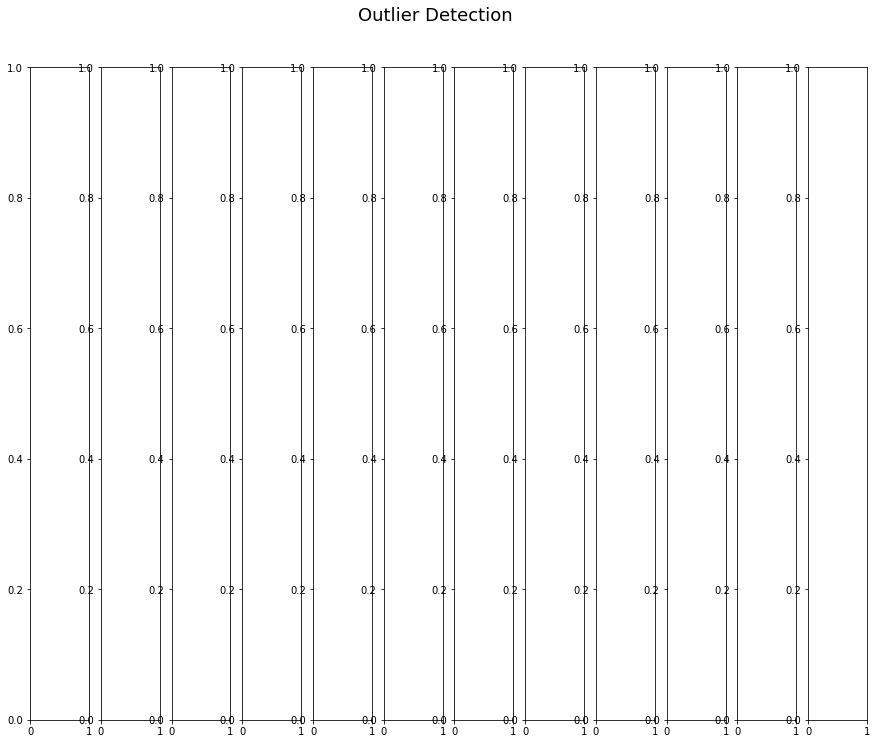

In [38]:
# Check for outliers
num_columns = df.shape[1]

# define subplot grid
fig, axs = plt.subplots(nrows = 1, ncols = num_columns, figsize=(15, 12))
#plt.subplots_adjust(hspace = 0.5)
fig.suptitle("Outlier Detection", fontsize=18, y=0.95)

for column, ax in enumerate(df.columns):
    df[column].plot(ax = ax)

    # chart formatting
    ax.set_title(column)
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

#sns.boxplot(x="variable", y="value", data=df)
#df.plot(kind='box')
#plt.show()
#g = sns.FacetGrid(df)
#g.map(sns.boxplot)
#for column in df.columns:
#    print(column)
    
    

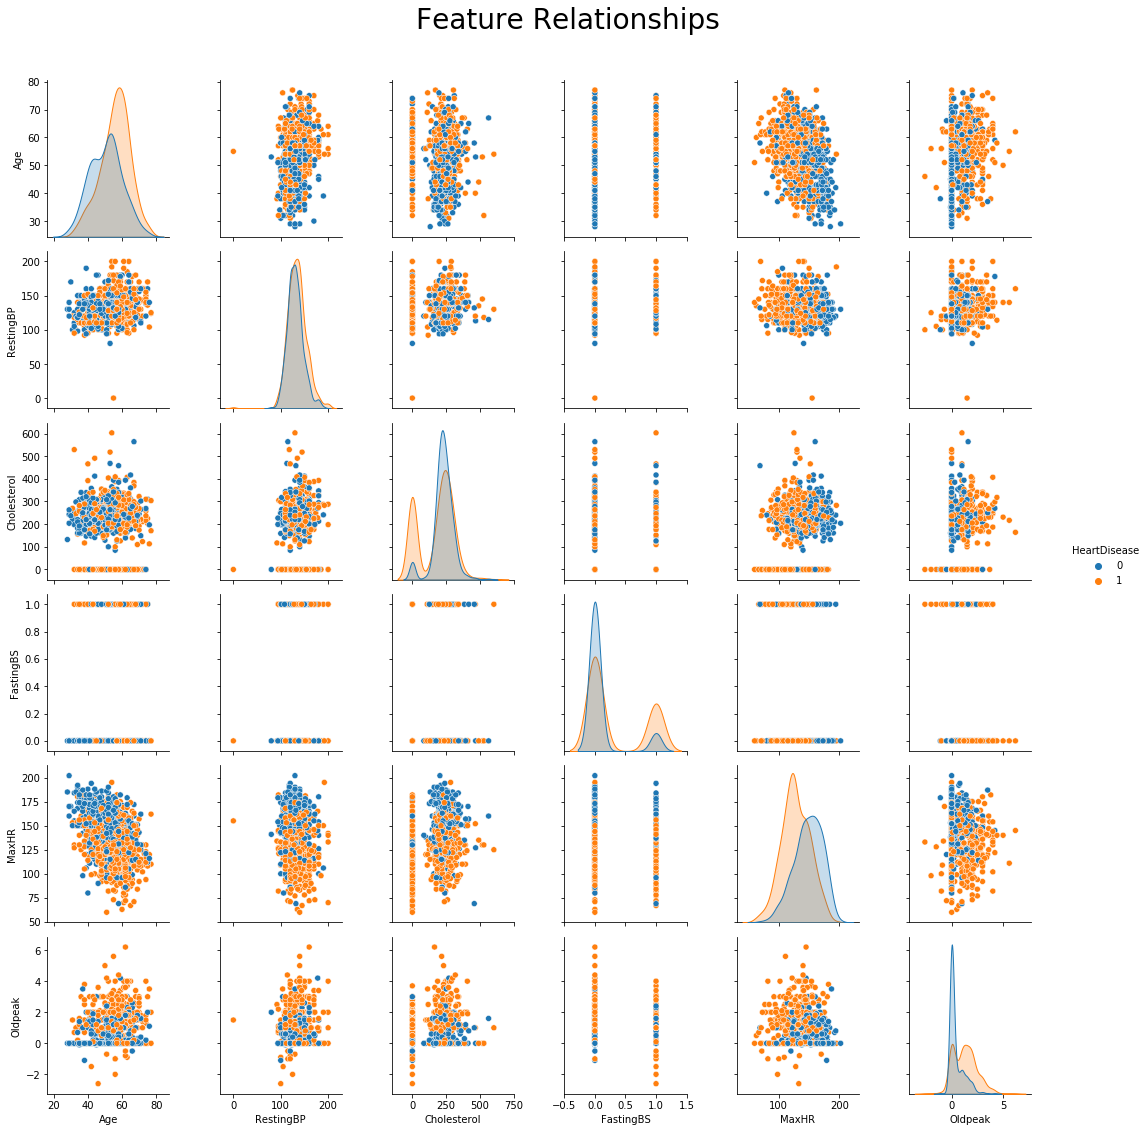

In [44]:
# Plot scatter plot matrix
# only plots numeric values
# pd.plotting.scatter_matrix(df)
sns.pairplot(df, hue = 'HeartDisease')
plt.suptitle('Feature Relationships', y = 1.05, size=28)
plt.savefig(os.path.join('Images', 'EDA_ScatterplotMatrix_NumericOnly.png'))


In [45]:
# Find numeric and categorical cols
def find_num_and_cat_cols(df):
    cat_cols = [col for col in df.columns if df[col].dtype == np.object]
    num_cols = [col for col in df.columns if df[col].dtype != np.object]
    assert len(cat_cols) + len(num_cols) == df.shape[1]
    return (cat_cols, num_cols)

In [46]:
cat_cols , num_cols = find_num_and_cat_cols(df)
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [47]:
# Find cardinality of categorical columns
cardinality = [len(df[col].unique()) for col in cat_cols]
cardinality

[2, 4, 3, 2, 3]

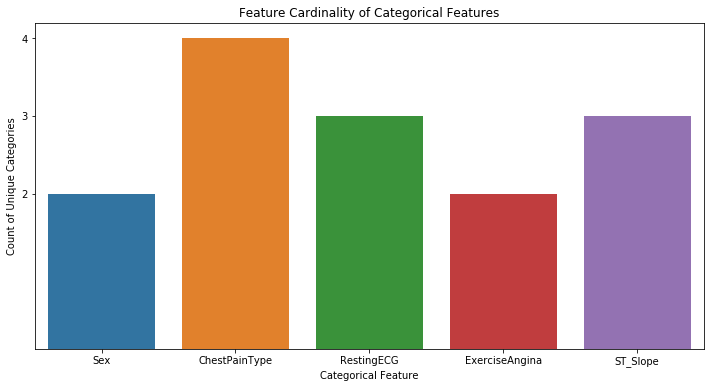

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x = cat_cols, y = cardinality)
ax.set_xlabel('Categorical Feature')
ax.set_ylabel('Count of Unique Categories')
ax.set_title('Feature Cardinality of Categorical Features')
ax.set_yticks(np.arange(min(cardinality), max(cardinality)+1, 1.0))
fig.savefig(os.path.join('Images', 'EDA_Cardinality.png'))

In [49]:
def convert_cat_to_numeric(dataframe):
    new_dataframe = dataframe.copy(deep = True)
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == np.object]
    for col in cat_cols:
        new_dataframe[col] = pd.Categorical(dataframe[col]).codes
    return new_dataframe

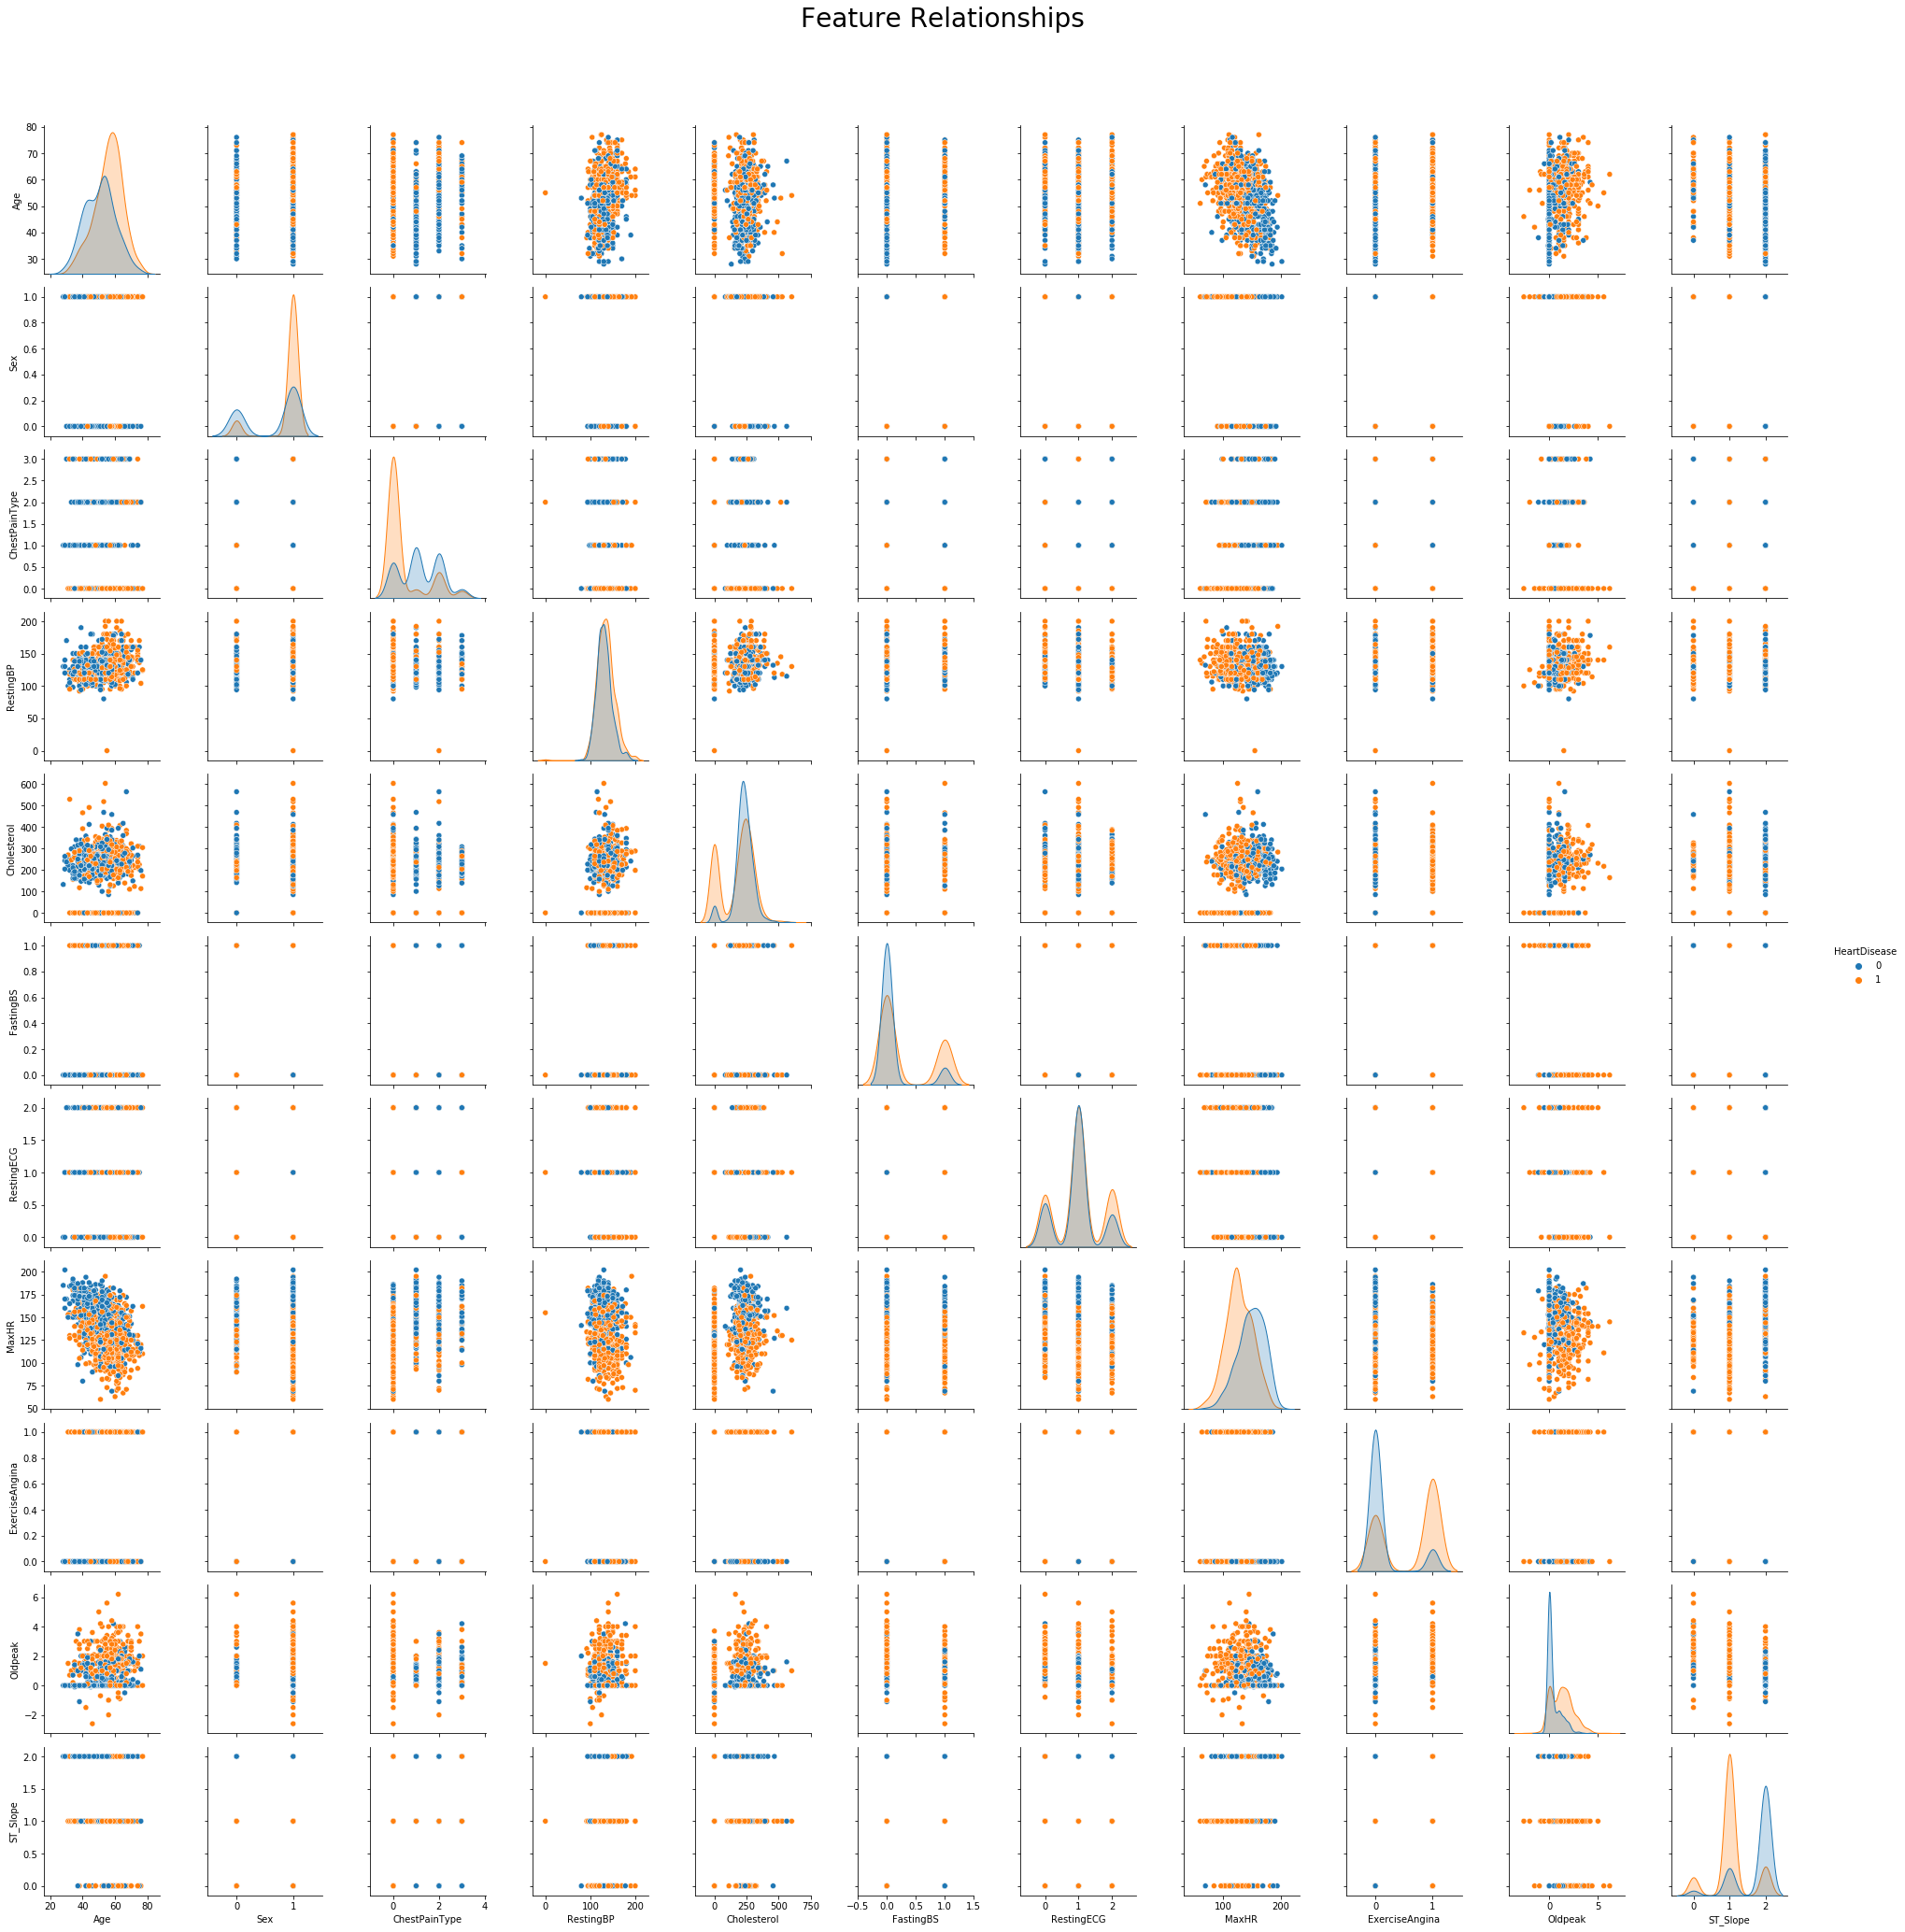

In [50]:
df_numeric = convert_cat_to_numeric(df)
sns.pairplot(df_numeric, hue = 'HeartDisease')
plt.suptitle('Feature Relationships', y = 1.05, size=28)
plt.savefig(os.path.join('Images', 'EDA_ScatterplotMatrix.png'))


In [51]:
def one_hot_encode(df, cols):
    df_copy = df.copy()
    for col in cols:
        onehot = pd.get_dummies(df_copy[col], prefix = col)
        new_df = pd.concat([onehot, df_copy], axis = 1)
        new_df.drop([col], axis = 1, inplace = True)
        df_copy = new_df
    return df_copy

In [52]:
new_df = one_hot_encode(df, ['Sex', 'ExerciseAngina'])
new_df

,ExerciseAngina_N,ExerciseAngina_Y,Sex_F,Sex_M,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,1,0,0,1,40,ATA,140,289,0,Normal,172,0.0,Up,0
1,1,0,1,0,49,NAP,160,180,0,Normal,156,1.0,Flat,1
2,1,0,0,1,37,ATA,130,283,0,ST,98,0.0,Up,0
3,0,1,1,0,48,ASY,138,214,0,Normal,108,1.5,Flat,1
4,1,0,0,1,54,NAP,150,195,0,Normal,122,0.0,Up,0
5,1,0,0,1,39,NAP,120,339,0,Normal,170,0.0,Up,0
6,1,0,1,0,45,ATA,130,237,0,Normal,170,0.0,Up,0
7,1,0,0,1,54,ATA,110,208,0,Normal,142,0.0,Up,0
8,0,1,0,1,37,ASY,140,207,0,Normal,130,1.5,Flat,1
9,1,0,1,0,48,ATA,120,284,0,Normal,120,0.0,Up,0


In [53]:
cat_cols, num_cols = find_num_and_cat_cols(new_df)